# Лабораторная работа №1
## Курс "Системы очувствления роботов"

Вы (инженер-робототехник) хотите определить радиус колеса робота. Вы помните из физики, что $$v = Rw$$ где $v$ - линейная скорость, $R$ - радиус колеса, а $w$ угловая скорость колеса. <br>
Используя данные с акселерометра и энкодера, вы получили следующие данные:

|Угловая скорость (w) | Линейная скорость (v) |
|-------------|-------------|
| 0.2         | 1.23        |
| 0.3         | 1.38        |
| 0.4         | 2.06        |
| 0.5         | 2.47        |
| 0.6         | 3.17        |

Ваша задача:
1. Проведите линию через начало координат (т.е., определить параметр $R$ для $y = Rx$) к этим данным, используя метод наименьших квадратов. Вы можете предположить, что все измерения имеют одинаковую важность (точность).
2. Какова наилучшая оценка Радиуса в метрах?

# Часть 1: Пакетное решение

Сначала мы импортируем необходимые модули Python и загружаем измерения тока и напряжения в отдельные массивы:

In [3]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Store the data as column vectors.
w = np.mat([0.2, 0.3, 0.4, 0.5, 0.6]).T
v = np.mat([1.23, 1.38, 2.06, 2.47, 3.17]).T

Теперь мы можем построить график измерений. Можете ли вы увидеть линейную зависимость между измеряемыми величинами?

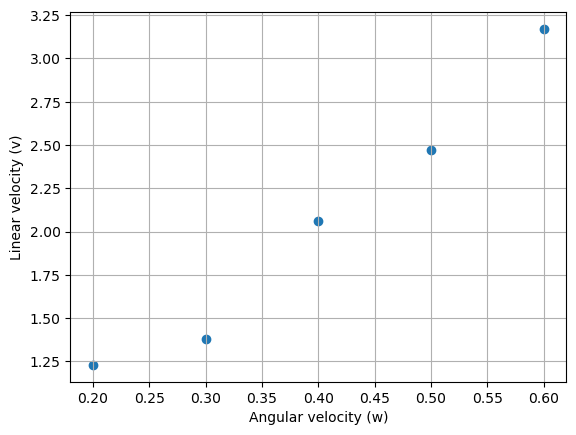

In [4]:
plt.scatter(np.asarray(w), np.asarray(v))

plt.xlabel('Angular velocity (w)')
plt.ylabel('Linear velocity (v)')
plt.grid(True)
plt.show()

## Оценка значения параметра
----
Давайте попробуем оценить параметр наклона $R$ используя метод наименьших квадратов:

\begin{align}
\hat{R} = \left(\mathbf{H}^T\mathbf{H}\right)^{-1}\mathbf{H}^T\mathbf{y}
\end{align}

Если мы знаем, что мы ищем параметр наклона $R$, как мы определяем матрицу $\mathbf{H}$ и вектор $\mathbf{y}$?

In [5]:
# Define the H matrix, what does it contain?
H = np.ones(len(w)).reshape(len(w), 1)
H_transp = H.reshape(1, len(w))
R_vect = v / w
# Now estimate the resistance parameter.
# R = ...
R = float(np.dot(inv(np.dot(H_transp, H)),np.dot(H_transp, R_vect)))

print('The slope parameter (i.e., radius) for the best-fit line is:', R)

The slope parameter (i.e., radius) for the best-fit line is: 5.224666666666667


In [6]:
R_vect

matrix([[6.15      ],
        [4.6       ],
        [5.15      ],
        [4.94      ],
        [5.28333333]])

In [7]:
H

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

## Рисуем график с результатами
----
Теперь давайте визуализируем наш результат.

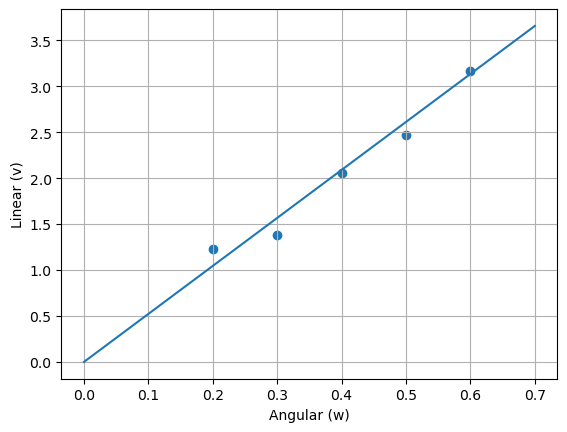

In [8]:
w_line = np.arange(0, 0.8, 0.1)
v_line = R * w_line
plt.scatter(np.asarray(w), np.asarray(v))
plt.plot(w_line, v_line)
plt.xlabel('Angular (w)')
plt.ylabel('Linear (v)')
plt.grid(True)
plt.show()

## Часть 2: Оценка нескольких параметров


----
Методом пакетного МНК (когда все данные уже имеются). В отличии от предыдущего раза, на этот раз мы подберем модель, которая содержит смещение $y = Rx + b$. Мы можем использовать результаты позже для сравнения.

В чем физический смысл этого смещения (парметр b)? Ответ: b это не что иное как постоянная составляющая ошибки, она одинаково влияет на кажое измерение (и зная его, мы можем повыстить точность измерения).


In [9]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

w = np.array([0.2, 0.3, 0.4, 0.5, 0.6])
v = np.array([1.23, 1.38, 2.06, 2.47, 3.17])

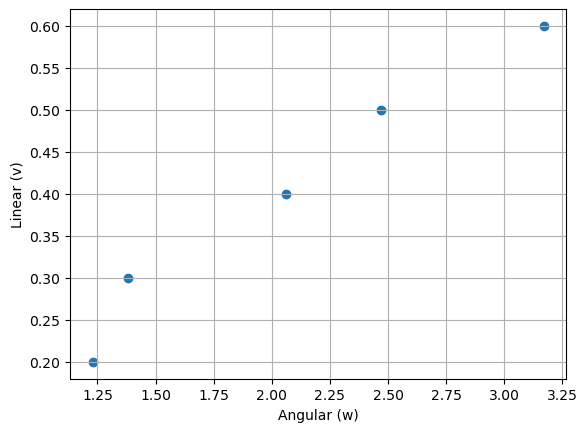

In [10]:
#отобразим на грифике
plt.scatter(v, w)

plt.xlabel('Angular (w)')
plt.ylabel('Linear (v)')
plt.grid(True)
plt.show()

Оцениваем параметр R и b, которые теперь у нас являются элементами вектора x (так как модель уже другая):

$x_{ls} = (H^{T}H)^{-1}H^{T}y$

Line parameters correspond ([R, b]):
[4.97  0.074]


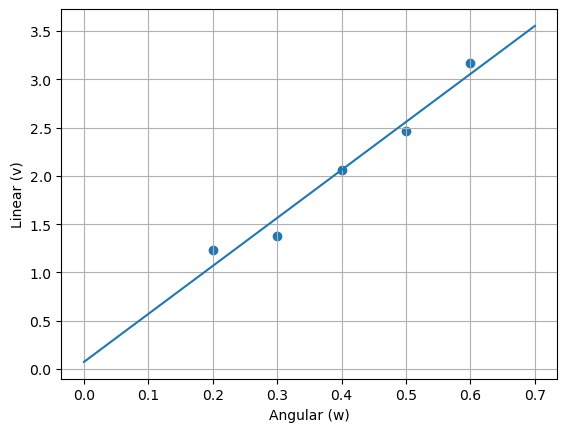

In [12]:
## Batch Solution
H = np.ones((5,2))
H[:, 0] = w
x_ls = linalg.inv(H.T.dot(H)).dot(H.T.dot(v))

print('Line parameters correspond ([R, b]):')
print(x_ls)

#Plot
w_line = np.arange(0, 0.8, 0.1)
v_line = x_ls[0]*w_line + x_ls[1]

plt.scatter(w, v)
plt.plot(w_line, v_line)
plt.xlabel('Angular (w)')
plt.ylabel('Linear (v)')
plt.grid(True)
plt.show()

In [13]:
H

array([[0.2, 1. ],
       [0.3, 1. ],
       [0.4, 1. ],
       [0.5, 1. ],
       [0.6, 1. ]])

In [14]:
# Давайте повнимательнее посмотрим, что же у нас находится теперь в матрице H
# понятно, почему именно такая матрица H ?
print(H)

[[0.2 1. ]
 [0.3 1. ]
 [0.4 1. ]
 [0.5 1. ]
 [0.6 1. ]]


# Часть 3: Рекурсивный МНК

В этом задании вам необходимо преобразовать свое решение наименьших квадратов в рекурсивное! Напомним, что у вас имеются все те же данные, что и в предыдущий раз. <br/>
Вы будете подгонять линейную модель, которая включает в себя смещение, $y = Rx + b$. Если следовать закону физики ($v = Rw$), мы ожидаем, что это смещение будет около нуля.

Вы будете устанавливать начальные параметры с предположением, что ваша предварительная оценка радиуса колеса $R = 3$, и это довольно грубая оценка. Кроме того, поскольку мы достаточно хорошо знаем, что закон физики справедлив ($v = Rw$), с уверенностью можно предположить, что смещение $b$ будет близко к 0. Инициализируйте оценку следующим образом:

$$\hat{R} \sim \mathcal{N}(3, 10.0), \hat{b} \sim \mathcal{N}(0, 0.3)$$
----
(Опционально)
Можно предположить, что мы отлично знаем линейную скорость, и что измерения угловой скорости искажены аддитивным, независимым и одинаково распределенным гауссовским шумом с дисперсией $0.0225 ~ w^2$.

----
Как и раньше, загрузите измерения в отдельные массивы и выведите значения:

In [15]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

w = np.array([0.2, 0.3, 0.4, 0.5, 0.6])
v = np.array([1.23, 1.38, 2.06, 2.47, 3.17])

## Проверяйте корректность программного кода, которая была для вас подготовлена!!!


Как правило, в практических задачах у нас измерительная инфорамция поступает с течением времени, а не доступна сразу как в предыдущих примерах. Следовательно, нам необходимо итеративно оценивать параметр с учетом вновь поступающих данных.

Теперь попробуйте рекурсивно реализовать метод наименьших квадратов: 

**Инициализируйте параметр и оценки ковариации**:


$$
\hat{\mathbf{x}}_0 = E\left[\mathbf{x}\right] \,\,\, , \,\,\, \mathbf{P}_0 = E\left[(\mathbf{x} - \hat{\mathbf{x}}_0)(\mathbf{x} - \hat{\mathbf{x}}_0)^T\right]
$$


In [16]:
## Рекурсивное решение
#Инициализируем ковариационную матрицу
# P_k = ...
P_k = np.zeros((2, 2), float)
presicion = np.array([10**2, 10**2])
np.fill_diagonal(P_k, presicion)

#Инициализировать оценку параметра x
x_k = np.array([3, 0])

#отклонение измерения (используется для расчет R_k)
v_k = 0.0225 #simga 

#сохраним исторические данные для визуализации в конце работы
num_meas = v.shape[0]
x_hist = np.zeros((num_meas + 1,2))
P_hist = np.zeros((num_meas + 1,2,2))

#запишем первичные значения
x_hist[0] = x_k
P_hist[0] = P_k

print("x_k=", x_k)
print("P_k=", P_k)
print("num_meas=", num_meas)

x_k= [3 0]
P_k= [[100.   0.]
 [  0. 100.]]
num_meas= 5


**Для каждого измерения k**:

----
  * Рассчитать поправочный коэффициент усиления $$\mathbf{K}_k = \mathbf{P}_{k-1}\mathbf{H}_k^T\left(\mathbf{H}_k\mathbf{P}_{k-1}\mathbf{H}_k^T + \mathbf{R}_k\right)^{-1}$$
  * Обновить оценку параметра $$\hat{\mathbf{x}}_k = \hat{\mathbf{x}}_{k-1} + \mathbf{K}_k\left(\mathbf{y}_k - \mathbf{H}_k\hat{\mathbf{x}}_{k-1}\right)$$
  * Обновить оценку ковариации $$\mathbf{P}_k = \left(\mathbf{1} - \mathbf{K}_k\mathbf{H}_k\right)\mathbf{P}_{k-1}$$

In [17]:
# R_k = 
H_k = np.ones((1,2))
#Итерируем по измерениям (имитируем поступление нового измерения на каждой итерации)
for k in range(num_meas):
    #Составим H_k (На основе модели)
    H_k[:,0] = v[k]
    #Расчет K_k
    K_k =
    #Обновить оценку
    # x_k = ...
    y_k = 
    x_k = 
    #Обновить неопределенность
    P_k = 

#записываем значение параметров
P_hist[k+1] = P_k
x_hist[k+1] = x_k
    
print('Наилучшая оценка параметра:')
print(x_k)

SyntaxError: invalid syntax (4024406005.py, line 8)

## Визуализация результатов
----
Давайте нарисуем результаты решения на каждом шаге. Сходится ли значение к "пакетному" решению наименьших квадратов из предыдущего блока?

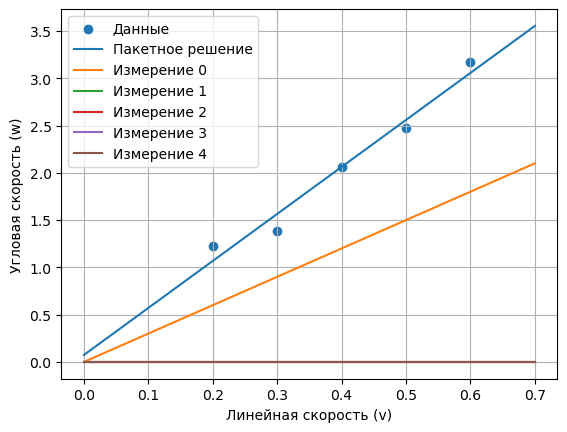

In [19]:
#Plot
plt.scatter(w, v, label='Данные')
plt.plot(w_line, v_line, label='Пакетное решение')
plt.xlabel('Линейная скорость (v)')
plt.ylabel('Угловая скорость (w)')
plt.grid(True)

w_line = np.arange(0, 0.8, 0.1)
for k in range(num_meas):
    v_line = x_hist[k,0]*w_line + x_hist[k,1]
    plt.plot(w_line, v_line, label='Измерение {}'.format(k))

plt.legend()
plt.show()